In [2]:
# importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [3]:
# paths to csv files
whale_returns_path = Path("whale_returns.csv")
algo_returns_path = Path("algo_returns.csv")
sp500_history_path = Path("sp500_history.csv")

# making csv files into data frames & converting dates to Datetime index
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.sort_index(ascending = True, inplace = True)
sp500_history_df.sort_index(ascending = True, inplace = True)

C:\Users\mikew\AppData\Local\Temp\ipykernel_18460\1494050596.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
C:\Users\mikew\AppData\Local\Temp\ipykernel_18460\1494050596.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
C:\Users\mikew\AppData\Local\Temp\ipykernel_18460\1494050596.py:9: FutureWarning: The argument 'infer_da

In [4]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [7]:
# identify null values for whale_returns
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# drop null values for whale_returns
whale_returns_df = whale_returns_df.dropna()

In [9]:
# identify null values for algo_returns
algo_returns_df.isnull().mean() * 100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# drop null values for algo_returns
algo_returns_df = algo_returns_df.dropna()

In [11]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace(",", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

In [13]:
# Calculate Daily Returns
sp500_history_df.isnull().sum()
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# identify null values for sp500_history
sp500_history_df.isnull().mean() * 100
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [15]:
# drop null values for sp500_history
sp500_history_df = sp500_history_df.dropna()

In [16]:
# Rename Column
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P500"})
sp500_returns_df.head()

,S&P500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Concatenate all DataFrames into a single DataFrame
combined_portfolios_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

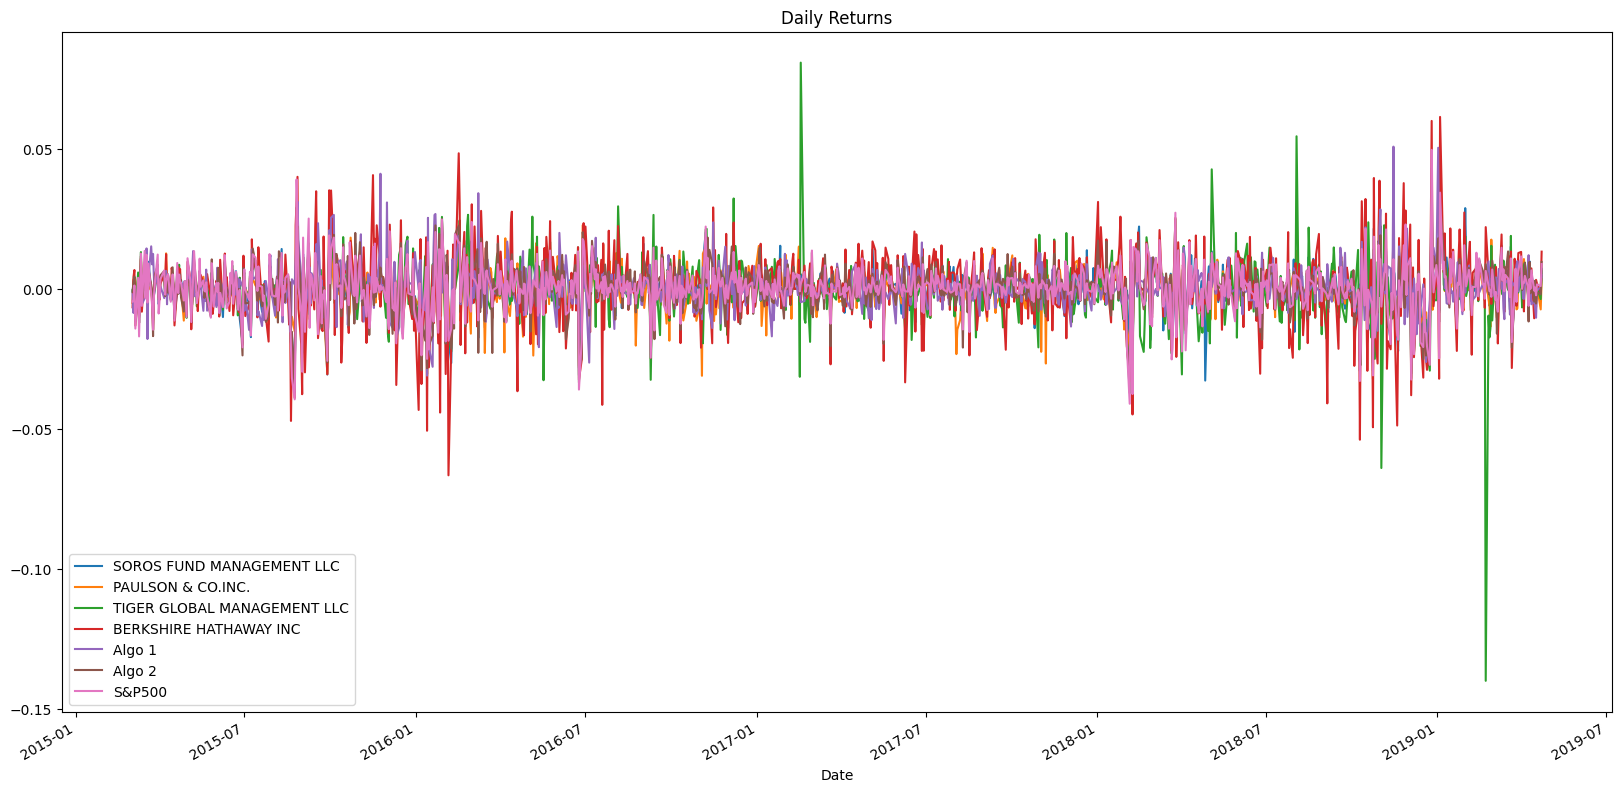

In [18]:
# Plot daily returns
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

<Axes: xlabel='Date'>

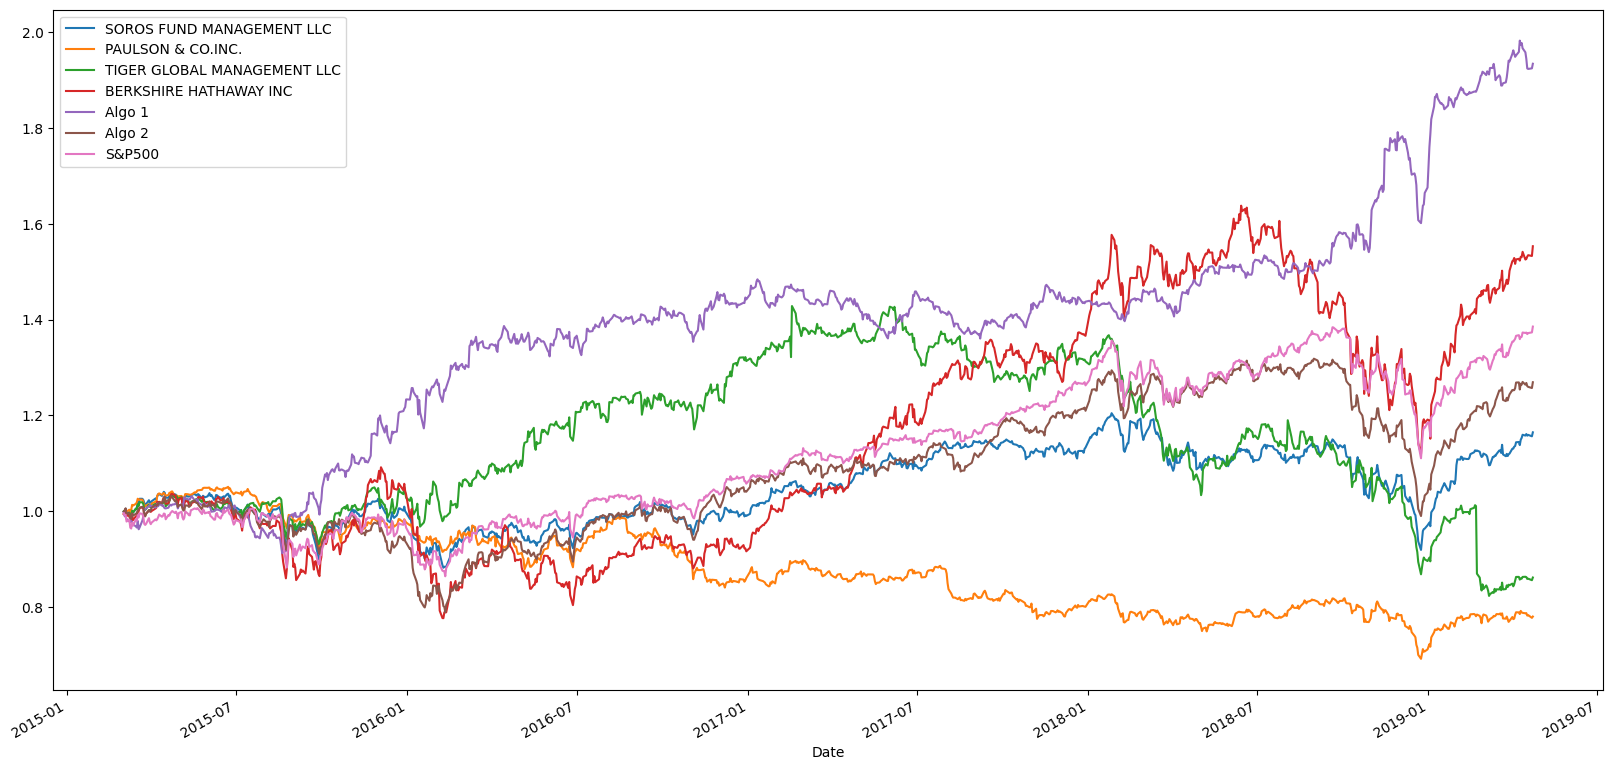

In [19]:
# Plot cumulative returns
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

<Axes: title={'center': 'Portfolio Risk'}>

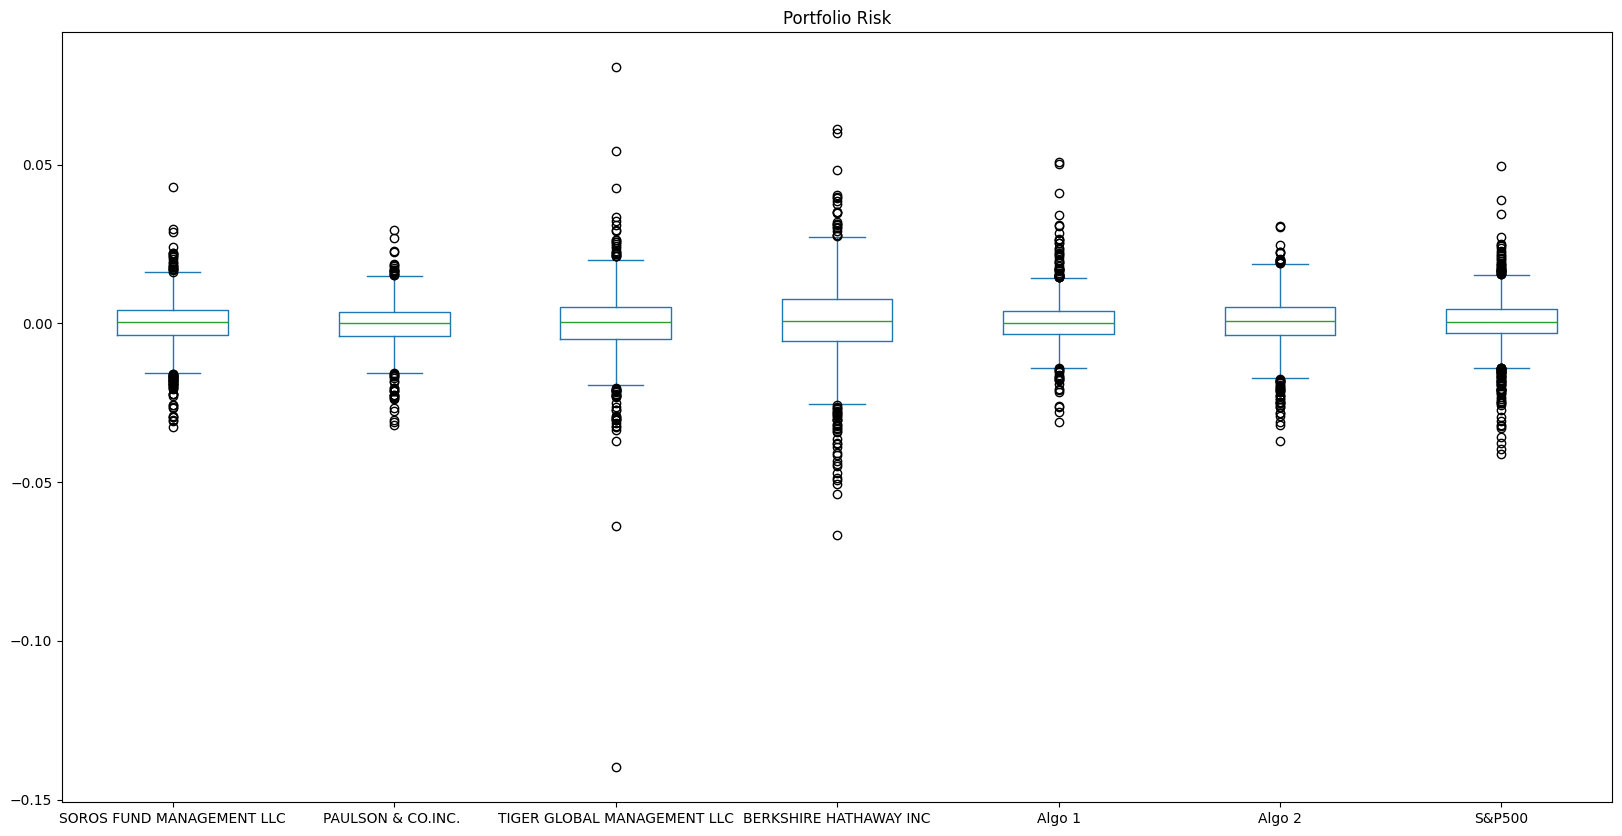

In [20]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

In [21]:
# Daily Standard Deviations
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 =[daily_std > daily_std['S&P500']]
portfolios_riskier_than_SP500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P500                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

<Axes: title={'center': '21 Day Rolling Standard Deviation'}, xlabel='Date'>

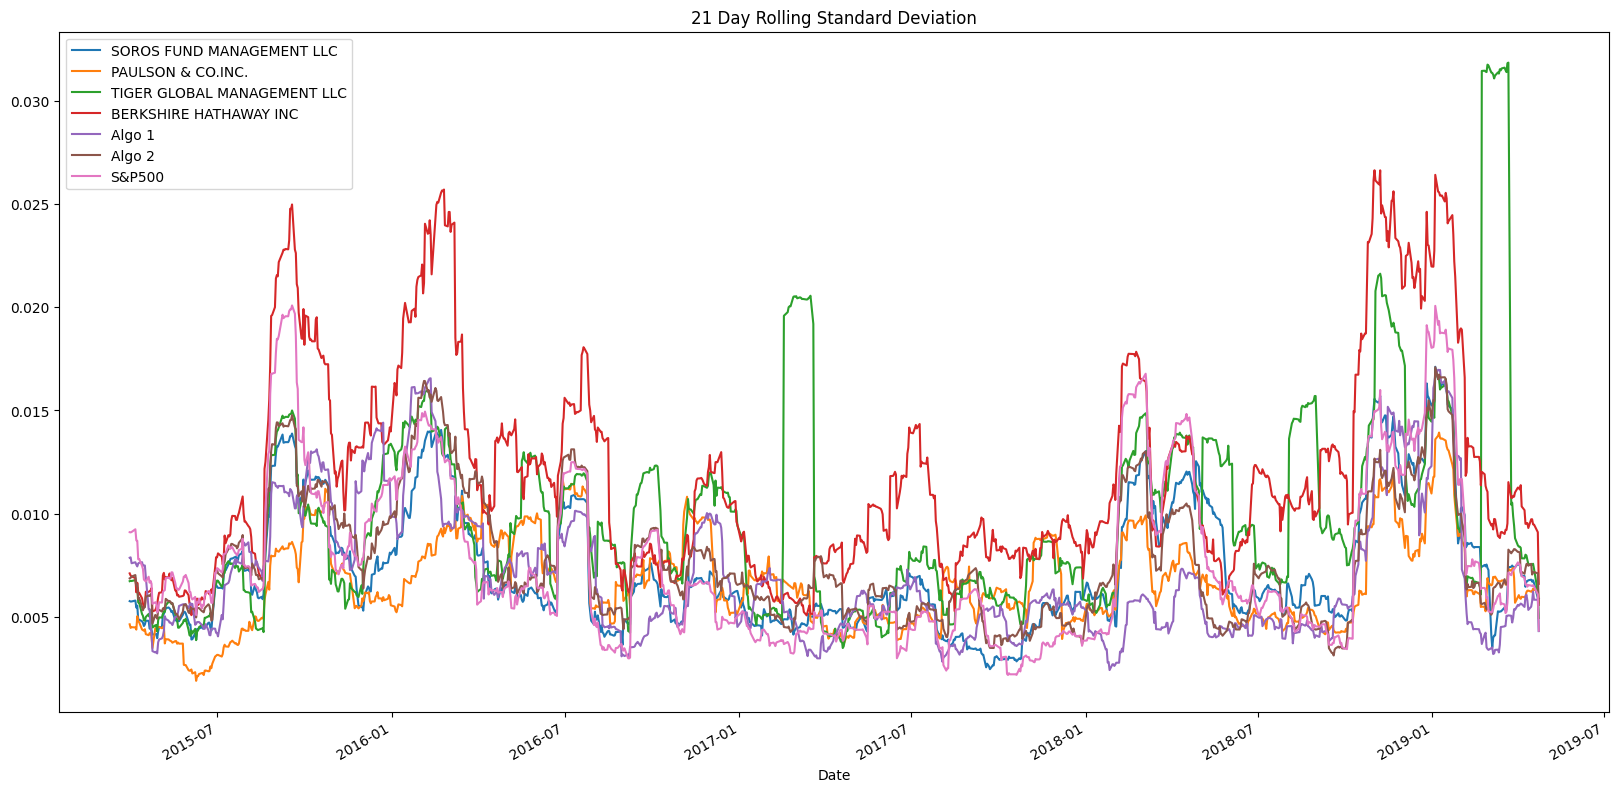

In [24]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [25]:
# Construct a correlation table
correlation = combined_portfolios_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<Axes: >

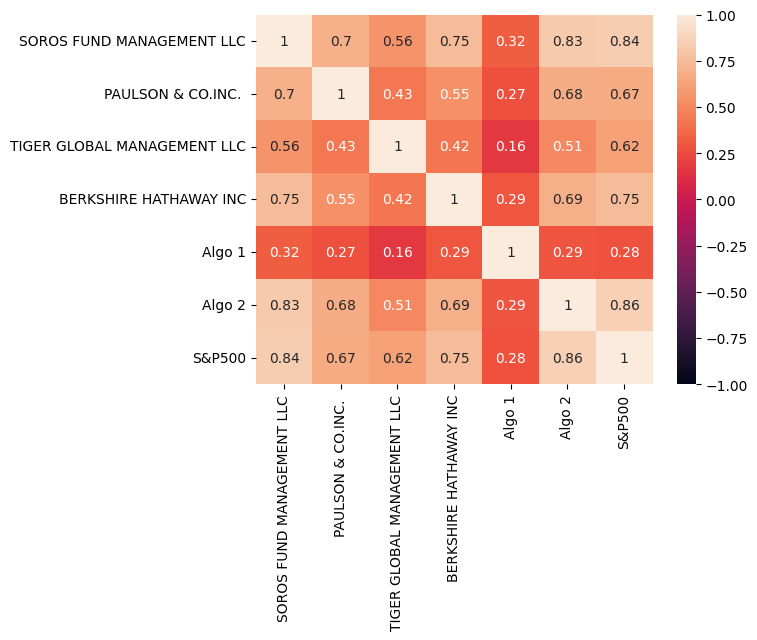

In [26]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

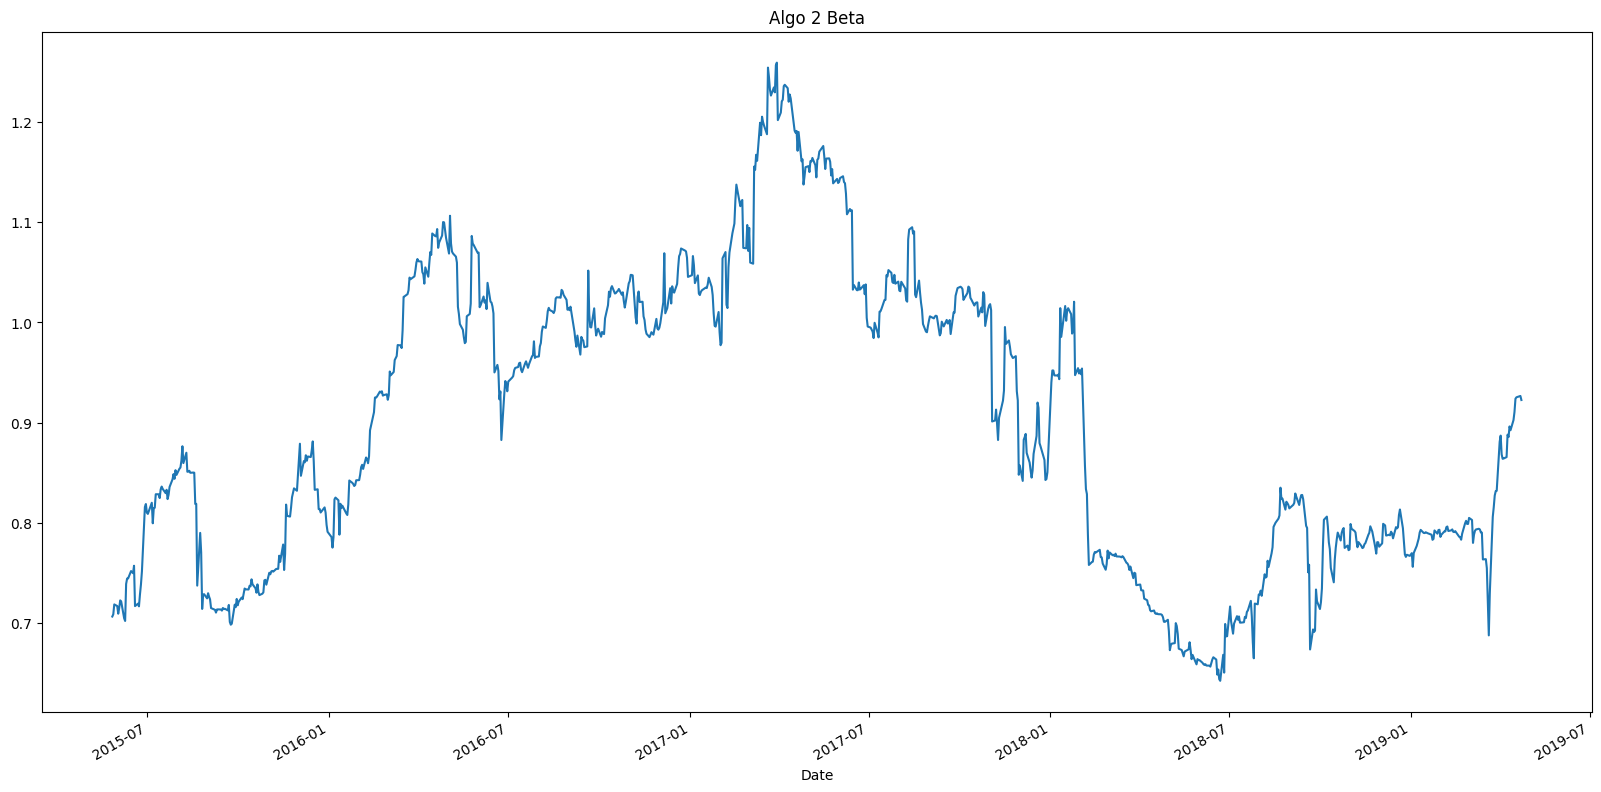

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Calculate covariance of all daily returns vs. S&P 500
algo_2_covariance = combined_portfolios_df['Algo 2'].rolling(window=60).cov(combined_portfolios_df['S&P500'])
algo_2_covariance
# Calculate variance of all daily returns vs. S&P 500
variance = combined_portfolios_df['S&P500'].rolling(window=60).var()
variance
# Calculate beta of all daily returns 
algo_2_beta = algo_2_covariance / variance
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))


<Axes: title={'center': 'Exponentialy Weighted Average'}, xlabel='Date'>

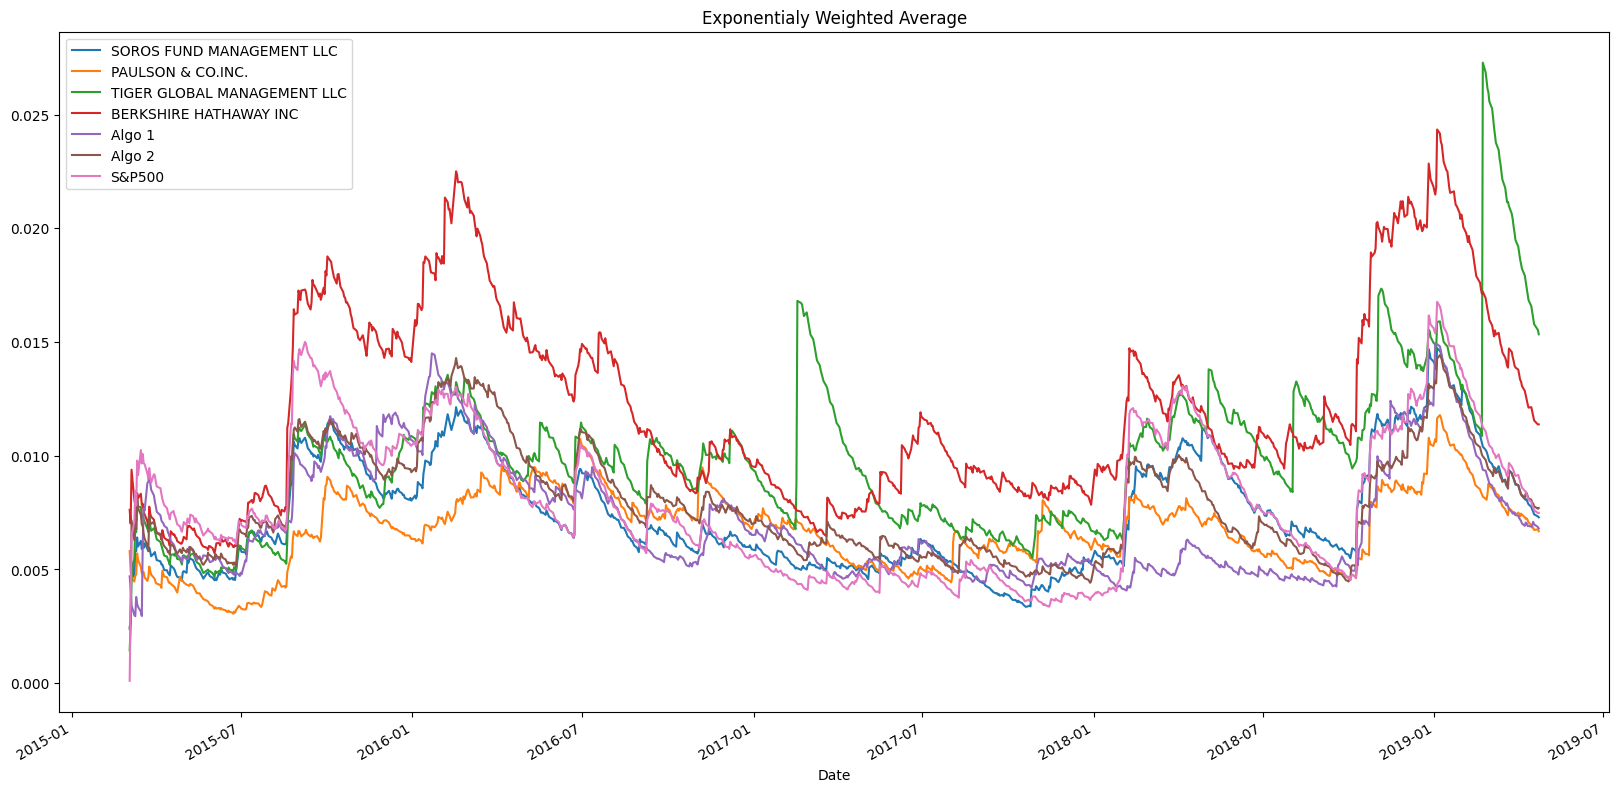

In [28]:
# Calculate a rolling window using the exponentially weighted moving average. 
#rolling_window_ewma = combined_portfolios_df.rolling(window=100).mean().plot(figsize=(20, 10))
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma


In [29]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

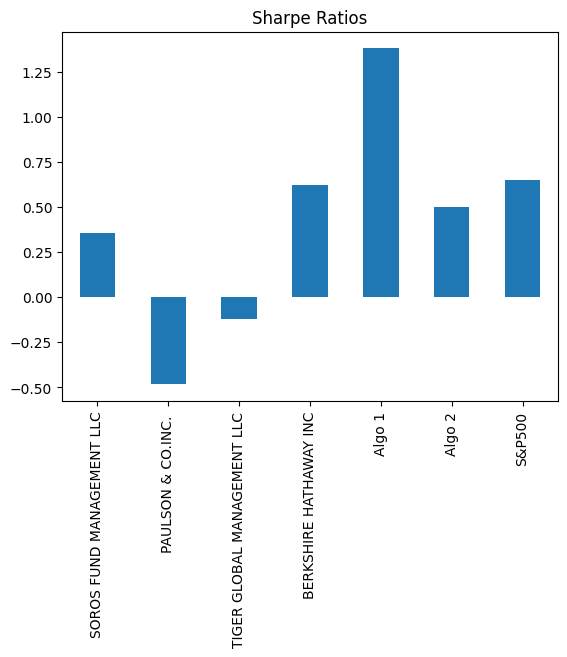

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [1]:
# CREATE A CUSTOM PORTFOLIO

SyntaxError: invalid syntax (4165330176.py, line 1)

In [57]:
# Read the first stock
appl_path = Path('aapl_historical.csv')
appl_df = pd.read_csv(appl_path, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True, usecols=['Trade DATE','NOCP'])
appl_df.head()

C:\Users\mikew\AppData\Local\Temp\ipykernel_18460\2370213633.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  appl_df = pd.read_csv(appl_path, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True, usecols=['Trade DATE','NOCP'])


,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [58]:
# Read the second stock
cost_path = Path('cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
cost_df.head()

C:\Users\mikew\AppData\Local\Temp\ipykernel_18460\4051161586.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])


,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [60]:
# Read the third stock
goog_path = Path('goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
goog_df.head()

C:\Users\mikew\AppData\Local\Temp\ipykernel_18460\3760457410.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])


,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [62]:
# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([appl_df, cost_df, goog_df], axis='columns', join='inner')
my_portfolio.columns = ['APPL', 'COST', 'GOOG']

my_portfolio_return = my_portfolio.sort_index().pct_change() 
my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [63]:
# Drop Nulls
my_portfolio_return.dropna(inplace=True)
my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [64]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_portfolio = my_portfolio_return.dot(weights)
weighted_portfolio.sum()

0.14569723027355788

In [65]:
cumulative_returns1 = (1 + weighted_portfolio).cumprod()-1
cumulative_returns1.sum()

16.31500423586185

In [68]:
portfolio_return = pd.concat([weighted_portfolio, whale_returns_df, sp500_returns_df], axis='columns', join='inner')
portfolio_return.rename(columns={0:'MY PORTFOLIO'}, inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_return.dropna(inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


In [70]:
# Risk
annual_portfolio_std = portfolio_return.std() * np.sqrt(252)
annual_portfolio_std

MY PORTFOLIO                   0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
S&P500                         0.152054
dtype: float64

In [71]:
# Rolling
portfolio_return.rolling(window=30).std().tail()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
2019-04-16,0.008764,0.006740,0.005751,0.007479,0.009869,0.006548
2019-04-17,0.008717,0.006539,0.005542,0.007362,0.009874,0.006415
2019-04-18,0.008226,0.006293,0.005513,0.006858,0.009057,0.006150
2019-04-22,0.007848,0.006340,0.005663,0.006895,0.008949,0.006107
2019-04-23,0.007033,0.005891,0.005624,0.006922,0.008608,0.005772


In [74]:
# Beta
covariance = portfolio_return['MY PORTFOLIO'].cov(portfolio_return['S&P500'])
variance = portfolio_return['S&P500'].var()
beta = covariance/variance
beta

1.2127120076458697

In [75]:
# Annualzied Sharpe Ratios
annual_portfolio_sharpe_ratio = (portfolio_return.mean() * 252)/(portfolio_return.std() * np.sqrt(252))
annual_portfolio_sharpe_ratio

MY PORTFOLIO                   0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
S&P500                         0.584820
dtype: float64

<Axes: >

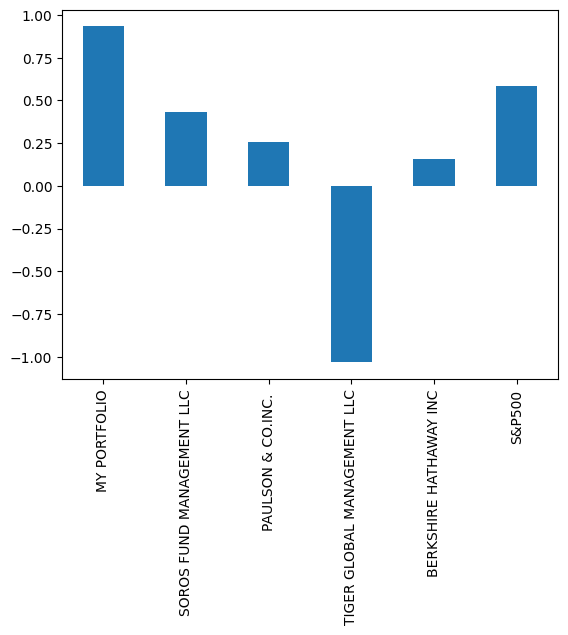

In [76]:
# Visualize the sharpe ratios as a bar plot
annual_portfolio_sharpe_ratio.plot.bar()

In [77]:
correlation = portfolio_return.corr()
correlation

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
MY PORTFOLIO,1.000000,0.733250,0.644210,0.391972,0.801158,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.852303
S&P500,0.871875,0.876981,0.766680,0.481030,0.852303,1.000000


<Axes: >

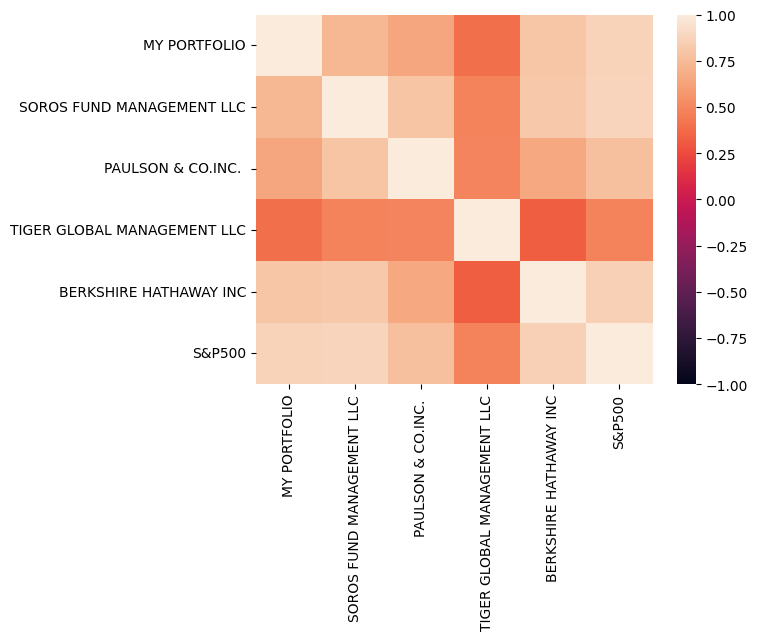

In [78]:
sns.heatmap(correlation, vmin=-1, vmax=1)

<Axes: xlabel='S&P500', ylabel='MY PORTFOLIO'>

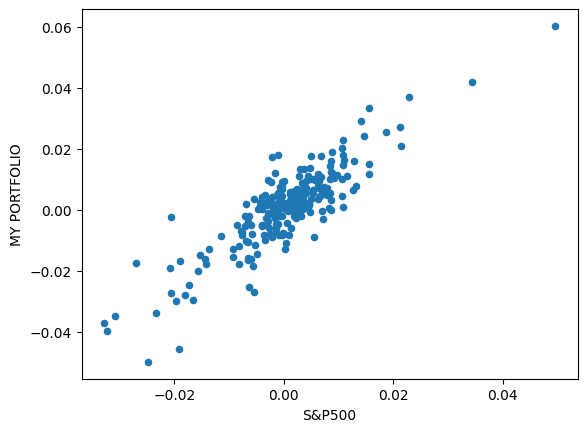

In [81]:
portfolio_return.plot(kind='scatter', x='S&P500', y='MY PORTFOLIO')